# Machine Learning Engineer Nanodegree
## Capstone Project - Final Report
As stated in the proposal, this capstone project aims to build a model able to successfuly predict whether a lead will be converted into a Nanodegree student in Udacity Brazil operation. To make sure this capstone is useful not only as a learning tool but also can be integrated in our workflow, we focused on **Digital Marketing leads**: Digital Marketing Nanodegree currently represents **over 50%** of all Brazilian students.
It's important to highlight that focusing on Digital Marketing students implies in not using trial feature, different that what was proposed. The reason is that this Nanodegree doesn't offer trial.
## Getting started
The dataset used was already prepared in the **`new_features.ipynb`** notebook. We did it in other notebook to better organize the presentation. This notebook is all about:
1. Data Exploration and Visualization
2. Application of different Supervised Learning Algorithms and Selection of best model
3. Parameter tunning and Model improvement

First step is to load the data:

In [86]:
import pandas as pd
import numpy as np
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("data_prepared.csv")
    data = data.drop('Unnamed: 0', 1)
    data = data.drop('email', 1)
    print("Dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Dataset has 22432 samples with 46 features each.


In [87]:
print(data[data['is_paying_student'] == 1].shape[0], data[data['is_paying_student'] == 1].shape[0] / data.shape[0])

2304 0.10271041369472182


In [78]:
sample_non_ps = data[data['is_paying_student'] == 0].sample(n=data[data['is_paying_student'] == 1].shape[0] * 2)
frames = [sample_non_ps, data[data['is_paying_student'] == 1]]
data = pd.concat(frames)
print(data[data['is_paying_student'] == 1].shape[0], data[data['is_paying_student'] == 1].shape[0] / data.shape[0])

2304 0.3333333333333333


In [79]:
#data.shape
data[data['is_paying_student'] == 0]

(6912, 46)

## Data Exploration and Visualization
In this section, we begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, and consider the relevance of each feature.

In [80]:
# Display a description of the dataset
display(data.describe().transpose())

display(data.head())

,count,mean,std,min,25%,50%,75%,max
opened_emails,6912.0,27.167969,42.673870,0.0,3.0,12.0,35.00,844.0
age_in_days,6912.0,156.513744,100.820880,18.0,90.0,125.0,170.00,414.0
webinar_enrollments,6912.0,0.230613,0.585159,0.0,0.0,0.0,0.00,10.0
course_enrollments,6912.0,2.103877,5.615024,0.0,0.0,0.0,2.00,127.0
is_business,6912.0,0.118345,0.488205,0.0,0.0,0.0,0.00,7.0
is_referrer_instagram,6912.0,0.000289,0.017009,0.0,0.0,0.0,0.00,1.0
is_signin,6912.0,3.281829,5.684298,0.0,0.0,2.0,4.00,117.0
is_ai,6912.0,0.227286,2.772468,0.0,0.0,0.0,0.00,204.0
is_checkout,6912.0,2.214120,4.354284,0.0,0.0,1.0,3.00,149.0
is_payment,6912.0,0.037616,0.442010,0.0,0.0,0.0,0.00,15.0


,opened_emails,age_in_days,webinar_enrollments,course_enrollments,is_business,is_referrer_instagram,is_signin,is_ai,is_checkout,is_payment,...,is_home,is_robotics,is_contact,is_referrer_google,is_fcop_st,is_referrer_linkedin,is_event,is_referrer_computerworld,is_legal,is_paying_student
13631,10,171,0,2,0,0,3,0,0,0,...,22,0,0,1,0,0,0,0,0,0
19671,3,134,0,1,0,0,1,0,0,0,...,6,0,0,6,0,0,0,0,0,0
14484,142,391,1,5,0,0,5,0,0,0,...,11,0,0,1,0,0,0,0,0,0
5568,1,81,0,2,0,0,5,0,0,0,...,6,0,0,6,0,0,0,0,0,0
14607,1,80,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0


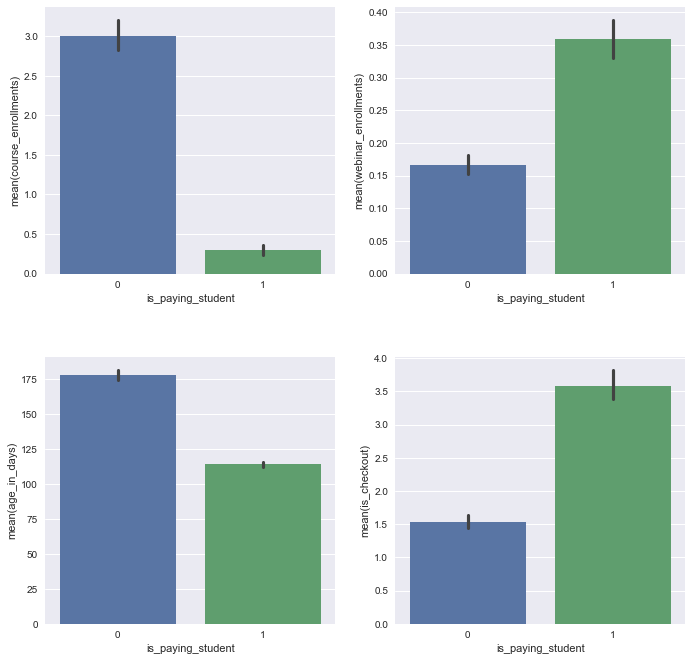

In [81]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1 = sns.barplot(x="is_paying_student", y="course_enrollments", data=data);

ax2 = fig.add_subplot(222)
ax2 = sns.barplot(x="is_paying_student", y="webinar_enrollments", data=data);

ax3 = fig.add_subplot(223)
ax3 = sns.barplot(x="is_paying_student", y="age_in_days", data=data);

ax4 = fig.add_subplot(224)
ax4 = sns.barplot(x="is_paying_student", y="is_checkout", data=data);

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

Here, we can draw some interesting conclusions from key features. We see, as expected, that leads who become paying students end up accessing over 2x more the checkout page vs. who doesn't convert. We also see, as expected, that leads who become paying students end up watching close to 3x more webinars than who doesn't convert.

We also observe, not so obviously, that the older an account is, less likely the lead is to convert. Also, the more a lead enrolls in a free course, the less likely it is for him/her to become a Nanodegree student.

## Application of different Supervised Learning Algorithms and Selection of best model
Now, we will i) prepare the data for modeling, training and testing, ii) initialize helper functions which we will use for training and testing three supervised learning models, and iii) run the models and select the best ones based on their metrics.

In [82]:
feature_cols = list(data.columns[1:-1])
target_col = data.columns[-1]

X_all = data[feature_cols]
y_all = data[target_col]

# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# Set the number of training points
num_train = int(0.75 * X_all.shape[0])

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=42)

In [83]:
from sklearn import metrics

def modelfit(alg):
    # Fit the algorithm on the data
    alg.fit(X_train, y_train)

    # Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    accuracy_score_train = metrics.accuracy_score(y_train.values, dtrain_predictions)
    roc_auc_score_train = metrics.roc_auc_score(y_train, dtrain_predprob)
    f1_score_train = metrics.f1_score(y_train, dtrain_predictions, pos_label=1)

    # Predict test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
    accuracy_score_test = metrics.accuracy_score(y_test.values, dtest_predictions)
    roc_auc_score_test = metrics.roc_auc_score(y_test, dtest_predprob)
    f1_score_test = metrics.f1_score(y_test, dtest_predictions, pos_label=1)

    # Print model report:
    print("\nModel Report: {}".format(alg.__class__.__name__))
    print("Accuracy  (Train): {:.4f}".format(accuracy_score_train))
    print("Accuracy  (Test) : {:.4f}".format(accuracy_score_test))
    print("AUC Score (Train): {:.4f}".format(roc_auc_score_train))
    print("AUC Score (Test) : {:.4f}".format(roc_auc_score_test))
    print("F1 score  (Train): {:.4f}".format(f1_score_train))
    print("F1 score  (Test) : {:.4f}".format(f1_score_test))
    
    df = pd.DataFrame(columns=['model', 'set', 'metric', 'score'])
    df.loc[0] = [alg.__class__.__name__, 'train', 'accuracy', accuracy_score_train]
    df.loc[1] = [alg.__class__.__name__, 'test', 'accuracy', accuracy_score_test]
    df.loc[2] = [alg.__class__.__name__, 'train', 'AUC score', roc_auc_score_train]
    df.loc[3] = [alg.__class__.__name__, 'test', 'AUC score', roc_auc_score_test]
    df.loc[4] = [alg.__class__.__name__, 'train', 'F1 score', f1_score_train]
    df.loc[5] = [alg.__class__.__name__, 'test', 'F1 score', f1_score_test]
    return df

In [84]:
## Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Initialize the three models
model_a = GaussianNB()
model_b = KNeighborsClassifier()
model_c = SGDClassifier(loss='log')
model_d = LogisticRegression()
model_e = XGBClassifier()

model_scores = pd.DataFrame(columns=['model', 'set', 'metric', 'score'])
frames = []
for model in [model_a, model_b, model_c, model_d, model_e]:
    ms = modelfit(model)
    frames.append(ms)
    
model_scores = pd.concat(frames, ignore_index=True)


Model Report: GaussianNB
Accuracy  (Train): 0.5691
Accuracy  (Test) : 0.5301
AUC Score (Train): 0.8510
AUC Score (Test) : 0.8212
F1 score  (Train): 0.6025
F1 score  (Test) : 0.5630

Model Report: KNeighborsClassifier
Accuracy  (Train): 0.8715
Accuracy  (Test) : 0.8171
AUC Score (Train): 0.9455
AUC Score (Test) : 0.8610
F1 score  (Train): 0.8124
F1 score  (Test) : 0.7238

Model Report: SGDClassifier
Accuracy  (Train): 0.6437
Accuracy  (Test) : 0.6111
AUC Score (Train): 0.7296
AUC Score (Test) : 0.7076
F1 score  (Train): 0.6504
F1 score  (Test) : 0.6160


/Users/carlos/anaconda/lib/python3.5/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)



Model Report: LogisticRegression
Accuracy  (Train): 0.8341
Accuracy  (Test) : 0.8478
AUC Score (Train): 0.9139
AUC Score (Test) : 0.9071
F1 score  (Train): 0.7359
F1 score  (Test) : 0.7512

Model Report: XGBClassifier
Accuracy  (Train): 0.8912
Accuracy  (Test) : 0.8698
AUC Score (Train): 0.9568
AUC Score (Test) : 0.9393
F1 score  (Train): 0.8376
F1 score  (Test) : 0.7949


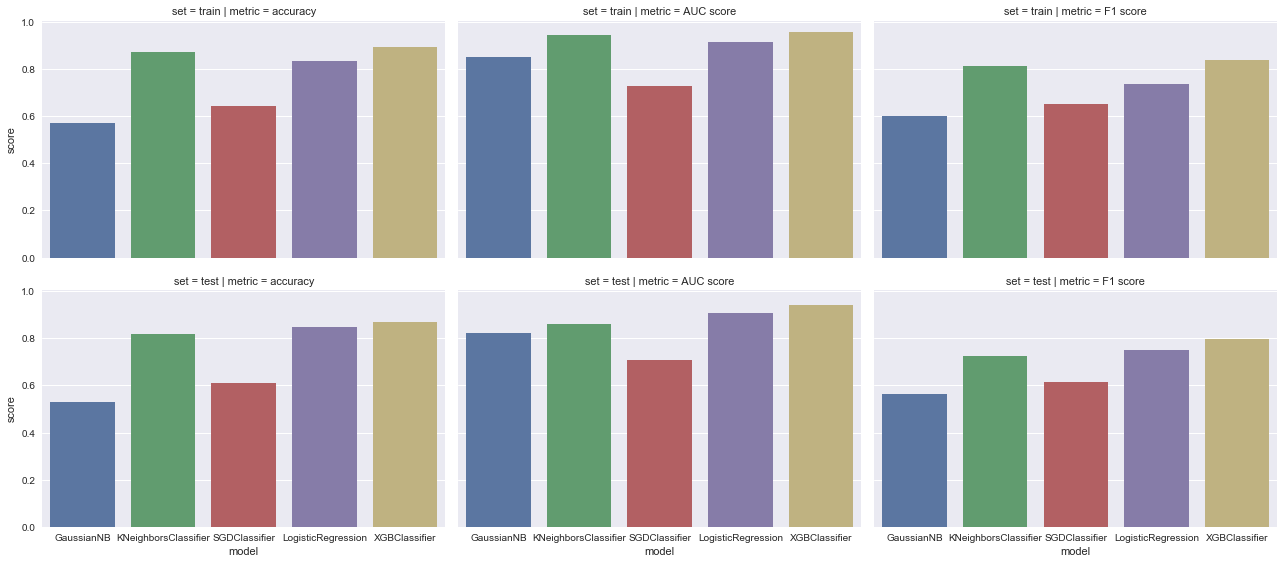

In [85]:
g = sns.factorplot(x="model", y="score", col="metric", row='set', data=model_scores, saturation=.7, kind="bar", ci=None, aspect=1.5)

We compared **accuracy**, **AUC score** and **F1 score** for 5 models: 
1. Gaussian Naive Bayes
2. K-Nearest Neighbors
3. Stochastic Gradient Descent
4. Logistic Regression
5. Extreme Gradient Boosting ([tutorial](http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf))

**Extreme Gradient Boost** won all metrics in both training and test datasets. Therefore, we have choosen this algorithm to move forward to the last step.

## Parameter tunning and Model improvement
Final step is to fine tune the chosen model. We will use grid search (GridSearchCV) library. We will follow the step-by-step approach described in [Complete Guide to Parameter Tuning in XGBoost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) article.
### Setup
Before we go into the parameter tunning, we will implement a helper function to enable us to see which are the best parameters and perform cross-validation (using the built-in function provided by XGBoost). Also, from now on, we will discart **accuracy** and look at **AUC score** only, as our dataset is very imbalanced.

In [37]:
def modelfit(alg, show_feature_importance=False, use_train_cv=True, cv_folds=5, early_stopping_rounds=50, debug=True):

    if use_train_cv:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    # Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric='auc')

    # Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    roc_auc_score_train = metrics.roc_auc_score(y_train, dtrain_predprob)
    #f1_score_train = metrics.f1_score(y_train, dtrain_predictions, pos_label=1)

    # Predict test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
    roc_auc_score_test = metrics.roc_auc_score(y_test, dtest_predprob)
    #f1_score_test = metrics.f1_score(y_test, dtest_predictions, pos_label=1)

    # Print model report:
    if debug:
        print("\nModel Report: {}".format(alg.__class__.__name__))
        print("AUC Score (Train): {:.4f}".format(roc_auc_score_train))
        print("AUC Score (Test) : {:.4f}".format(roc_auc_score_test))
        #print("F1 score  (Train): {:.4f}".format(f1_score_train))
        #print("F1 score  (Test) : {:.4f}".format(f1_score_test))

    if show_feature_importance:
        xgb.plot_importance(alg.booster())
        print('AUC score mean of cross-validation sets (test): {:.4f}'.format(cvresult.tail(1)['test-auc-mean'].item()))
        print('Optimal number of trees n_estimators: {}'.format(cvresult.tail(1).index[0]))
        
    df = pd.DataFrame(columns=['model', 'set', 'metric', 'score'])
    df.loc[0] = [alg.__class__.__name__, 'train', 'AUC score', roc_auc_score_train]
    df.loc[1] = [alg.__class__.__name__, 'test', 'AUC score', roc_auc_score_test]
    #df.loc[2] = [alg.__class__.__name__, 'train', 'F1 score', f1_score_train]
    #df.loc[3] = [alg.__class__.__name__, 'test', 'F1 score', f1_score_test]
    return df

AUC score mean of cross-validation sets (test): 0.9442
Optimal number of trees n_estimators: 404


,model,set,metric,score
0,XGBClassifier,train,AUC score,0.969287
1,XGBClassifier,test,AUC score,0.946209


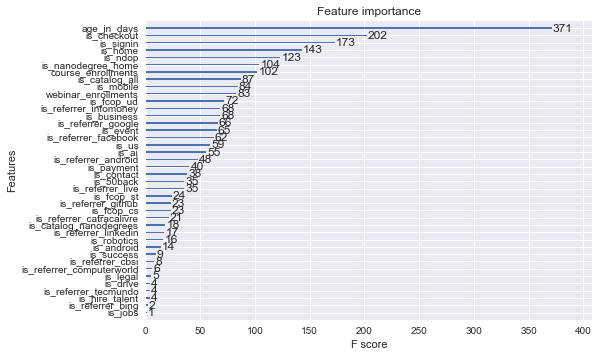

In [38]:
model = xgb.XGBClassifier(
    n_estimators=1000,
    nthread=8,
    seed=27
)
modelfit(model, show_feature_importance=True, debug=False)

### Tuning max_depth and min_child_weight
We tune these first as they will have the highest impact on model outcome. To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

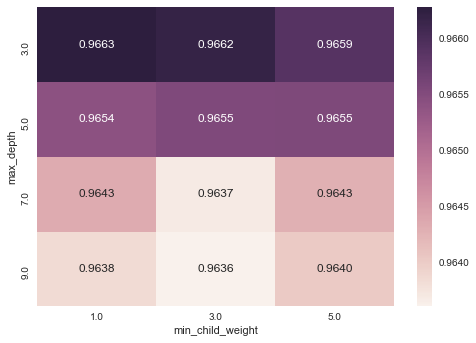

In [256]:
from sklearn.grid_search import GridSearchCV 

param_test1 = {
 'max_depth': [3, 5, 7, 9],
 'min_child_weight': [1, 3, 5]
}
gsearch1 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        learning_rate=0.1, 
        n_estimators=502, 
        max_depth=5,
        min_child_weight=1, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27), 
    param_grid=param_test1, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch1.fit(X_train, y_train)

gsearch1_df = pd.DataFrame(columns=['max_depth', 'min_child_weight', 'roc_auc'])
for index, row in enumerate(gsearch1.grid_scores_):
    gsearch1_df.loc[index] = [row[0]['max_depth'], row[0]['min_child_weight'], row[1]]

ax = sns.heatmap(gsearch1_df.pivot('max_depth', 'min_child_weight', 'roc_auc'), annot=True, fmt="0.4f")

Let's go one step further and analyize within the range **`[2, 3, 4]`** for **`max_depth`** and **`1`** for **`min_child_weight`**:

In [258]:
param_test2 = {
 'max_depth': [2, 3, 4],
}
gsearch2 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        learning_rate=0.1, 
        n_estimators=502, 
        max_depth=5,
        min_child_weight=1, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27), 
    param_grid=param_test2, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_
#gsearch2_df = pd.DataFrame(columns=['max_depth', 'min_child_weight', 'f1_score'])
#for index, row in enumerate(gsearch2.grid_scores_):
#    gsearch2_df.loc[index] = [row[0]['max_depth'], row[0]['min_child_weight'], row[1]]

#ax = sns.heatmap(gsearch2_df.pivot('max_depth', 'min_child_weight', 'f1_score'), annot=True, fmt="0.4f")

([mean: 0.96408, std: 0.00340, params: {'max_depth': 2},
  mean: 0.96628, std: 0.00374, params: {'max_depth': 3},
  mean: 0.96555, std: 0.00393, params: {'max_depth': 4}],
 {'max_depth': 3},
 0.9662782137086483)

The best parameters for **`max_depth`** and **`min_child_weight`** are **3** and **1**, respectively. They returned a **AUC score** of **`0.9663`**.

### Tune gamma
Now lets tune gamma value using the parameters already tuned above. Gamma can take various values but I’ll check for 5 values here:

In [259]:
param_test3 = {
 'gamma': np.arange(0, 0.5, 0.1)
}
gsearch3 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        learning_rate=0.1, 
        n_estimators=502, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27), 
    param_grid=param_test3, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.96628, std: 0.00374, params: {'gamma': 0.0},
  mean: 0.96623, std: 0.00374, params: {'gamma': 0.10000000000000001},
  mean: 0.96598, std: 0.00396, params: {'gamma': 0.20000000000000001},
  mean: 0.96613, std: 0.00364, params: {'gamma': 0.30000000000000004},
  mean: 0.96608, std: 0.00378, params: {'gamma': 0.40000000000000002}],
 {'gamma': 0.0},
 0.9662782137086483)

The best parameters for **`gamma`** is **0**. It returned a **AUC score** of **`0.9663`**.

### Recalibration
Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters:

AUC score mean of cross-validation sets (test): 0.9660
Optimal number of trees n_estimators: 520


,model,set,metric,score
0,XGBClassifier,train,AUC score,0.984271
1,XGBClassifier,test,AUC score,0.962413


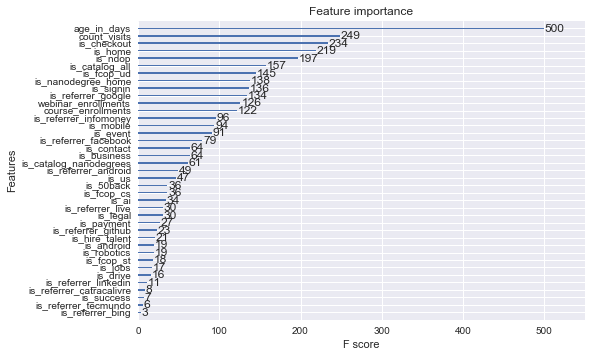

In [260]:
model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1, 
        
    max_depth=3,
    min_child_weight=1, 
    gamma=0,
    
    subsample=0.8, 
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=8, 
    scale_pos_weight=1, 
    seed=27
)
modelfit(model, show_feature_importance=True, debug=False)

We can see the parameters we have choosen improved the **AUC score** from **0.9651** to **0.9660**

### Tune subsample and colsample_bytree
The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as well and take values **`[0.6, 0.7, 0.8, 0.9]`** for both to start with.

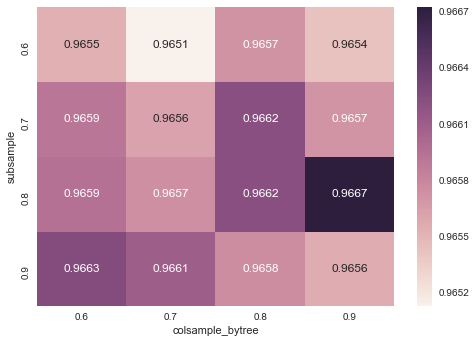

In [262]:
param_test4 = {
    'subsample': np.arange(0.6, 1, 0.1), 
    'colsample_bytree': np.arange(0.6, 1, 0.1)
}
gsearch4 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        n_estimators=520,
        learning_rate=0.1, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0,

        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27),
    param_grid=param_test4, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch4.fit(X_train, y_train)

gsearch4_df = pd.DataFrame(columns=['subsample', 'colsample_bytree', 'roc_auc'])
for index, row in enumerate(gsearch4.grid_scores_):
    gsearch4_df.loc[index] = [row[0]['subsample'], row[0]['colsample_bytree'], row[1]]

ax = sns.heatmap(gsearch4_df.pivot('subsample', 'colsample_bytree', 'roc_auc'), annot=True, fmt="0.4f")

Let's go one step further and analyize within the range **`[0.75, 0.77, 0.79, 0.81, 0.83, 0.85]`** for **`subsample`** and **`[0.85, 0.87, 0.89, 0.91, 0.93, 0.95]`** for **`colsample_bytree`**:

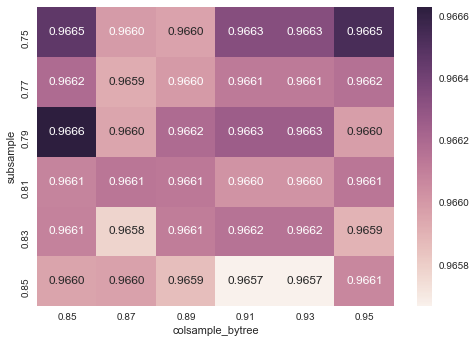

In [263]:
param_test5 = {
    'subsample': np.arange(0.75, 0.86, 0.02), 
    'colsample_bytree': np.arange(0.85, 0.96, 0.02)
}
gsearch5 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        n_estimators=520,
        learning_rate=0.1, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0,

        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27),
    param_grid=param_test5, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch5.fit(X_train, y_train)

gsearch5_df = pd.DataFrame(columns=['subsample', 'colsample_bytree', 'roc_auc'])
for index, row in enumerate(gsearch5.grid_scores_):
    gsearch5_df.loc[index] = [row[0]['subsample'], row[0]['colsample_bytree'], row[1]]

ax = sns.heatmap(gsearch5_df.pivot('subsample', 'colsample_bytree', 'roc_auc'), annot=True, fmt="0.4f")

Let's go one step further and analyize within the range **`[0.78, 0.79, 0.80]`** for **`subsample`** and **`[0.84, 0.85, 0.86]`** for **`colsample_bytree`**:

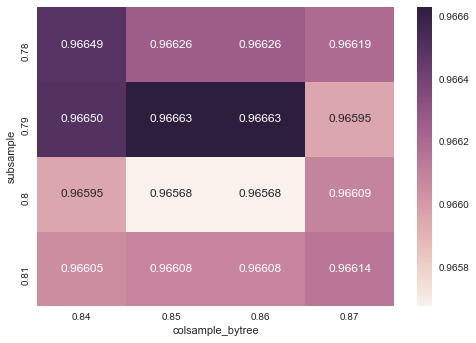

In [265]:
param_test5 = {
    'subsample': np.arange(0.78, 0.81, 0.01), 
    'colsample_bytree': np.arange(0.84, 0.87, 0.01)
}
gsearch5 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        n_estimators=520,
        learning_rate=0.1, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0,

        subsample=0.8, 
        colsample_bytree=0.8,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27),
    param_grid=param_test5, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch5.fit(X_train, y_train)

gsearch5_df = pd.DataFrame(columns=['subsample', 'colsample_bytree', 'roc_auc'])
for index, row in enumerate(gsearch5.grid_scores_):
    gsearch5_df.loc[index] = [row[0]['subsample'], row[0]['colsample_bytree'], row[1]]

ax = sns.heatmap(gsearch5_df.pivot('subsample', 'colsample_bytree', 'roc_auc'), annot=True, fmt="0.5f")

The best parameters for **`subsample`** and **`colsample_bytree`** are **0.79** and **0.85**, respectively. They returned a **AUC score** of **`0.96663`**.

### Tuning Regularization Parameters
Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it.

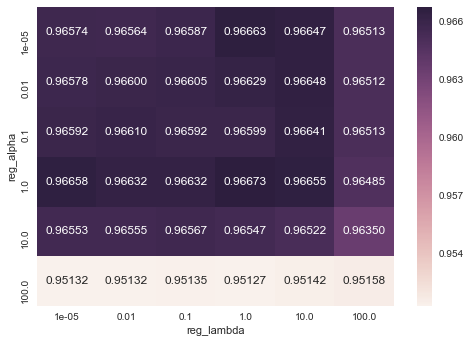

In [268]:
param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 10, 100],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 10, 100]
}
gsearch6 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        n_estimators=520,
        learning_rate=0.1, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0,
        subsample=0.79, 
        colsample_bytree=0.85,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27),
    param_grid=param_test6, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch6.fit(X_train, y_train)

gsearch6_df = pd.DataFrame(columns=['reg_alpha', 'reg_lambda', 'roc_auc'])
for index, row in enumerate(gsearch6.grid_scores_):
    gsearch6_df.loc[index] = [row[0]['reg_alpha'], row[0]['reg_lambda'], row[1]]

ax = sns.heatmap(gsearch6_df.pivot('reg_alpha', 'reg_lambda', 'roc_auc'), annot=True, fmt="0.5f")

Let's go one step further and analyize within the range **`[0.5, 1, 2]`** for **`reg_alpha`** and **`[0.5, 1, 2]`** for **`reg_lambda`**:

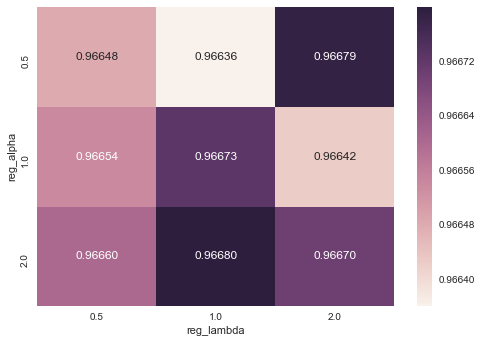

In [270]:
param_test6 = {
    'reg_alpha': [0.5, 1, 2],
    'reg_lambda': [0.5, 1, 2]
}
gsearch6 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        n_estimators=520,
        learning_rate=0.1, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0,
        subsample=0.79, 
        colsample_bytree=0.85,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27),
    param_grid=param_test6, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch6.fit(X_train, y_train)

gsearch6_df = pd.DataFrame(columns=['reg_alpha', 'reg_lambda', 'roc_auc'])
for index, row in enumerate(gsearch6.grid_scores_):
    gsearch6_df.loc[index] = [row[0]['reg_alpha'], row[0]['reg_lambda'], row[1]]

ax = sns.heatmap(gsearch6_df.pivot('reg_alpha', 'reg_lambda', 'roc_auc'), annot=True, fmt="0.5f")

Let's go one step further and analyize within the range **`[1.5, 2, 3, 4]`** for **`reg_alpha`** and **`[0.75, 1, 1.5]`** for **`reg_lambda`**:

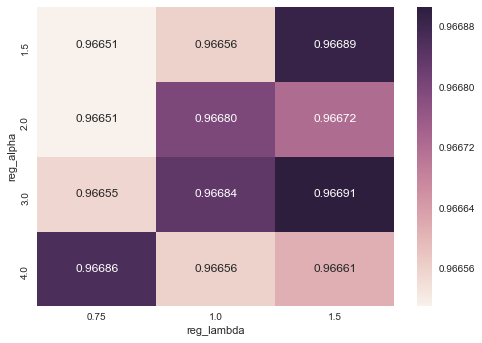

In [271]:
param_test6 = {
    'reg_alpha': [1.5, 2, 3, 4],
    'reg_lambda': [0.75, 1, 1.5]
}
gsearch6 = GridSearchCV(
    estimator = xgb.XGBClassifier(
        n_estimators=520,
        learning_rate=0.1, 
        max_depth=3,
        min_child_weight=1, 
        gamma=0,
        subsample=0.79, 
        colsample_bytree=0.85,
        objective= 'binary:logistic', 
        nthread=8, 
        scale_pos_weight=1, 
        seed=27),
    param_grid=param_test6, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch6.fit(X_train, y_train)

gsearch6_df = pd.DataFrame(columns=['reg_alpha', 'reg_lambda', 'roc_auc'])
for index, row in enumerate(gsearch6.grid_scores_):
    gsearch6_df.loc[index] = [row[0]['reg_alpha'], row[0]['reg_lambda'], row[1]]

ax = sns.heatmap(gsearch6_df.pivot('reg_alpha', 'reg_lambda', 'roc_auc'), annot=True, fmt="0.5f")

The best parameters for **`reg_alpha`** and **`reg_lambda`** are **3** and **1.5**, respectively. They returned a **AUC score** of **`0.96691`**.

### Recalibration
Before proceeding, let's re-calibrate and input all the updated parameters:

AUC score mean of cross-validation sets (test): 0.9665
Optimal number of trees n_estimators: 631


,model,set,metric,score
0,XGBClassifier,train,AUC score,0.982691
1,XGBClassifier,test,AUC score,0.963531


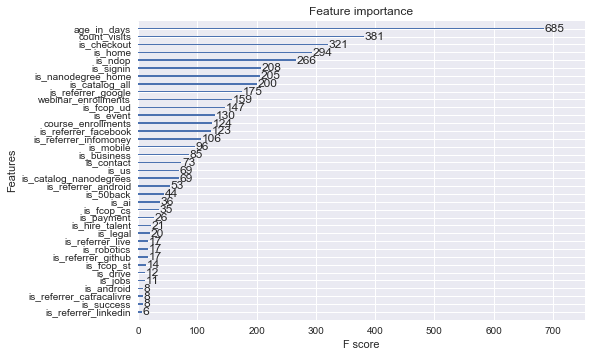

In [272]:
model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1, 
    max_depth=3,
    min_child_weight=1, 
    gamma=0,
    subsample=0.79, 
    colsample_bytree=0.85,
    objective= 'binary:logistic', 
    nthread=8, 
    scale_pos_weight=1, 
    seed=27,
    reg_alpha=3,
    reg_lambda=1.5
)
modelfit(model, show_feature_importance=True, debug=False)

This was the best result so far, showing that the parameter tunning worked. However, the improvement was small: **AUC score** went from **`0.9631`** to **`0.9635`**.

### Reducing Learning Rate
Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.

AUC score mean of cross-validation sets (test): 0.9664
Optimal number of trees n_estimators: 4315


,model,set,metric,score
0,XGBClassifier,train,AUC score,0.979787
1,XGBClassifier,test,AUC score,0.963075


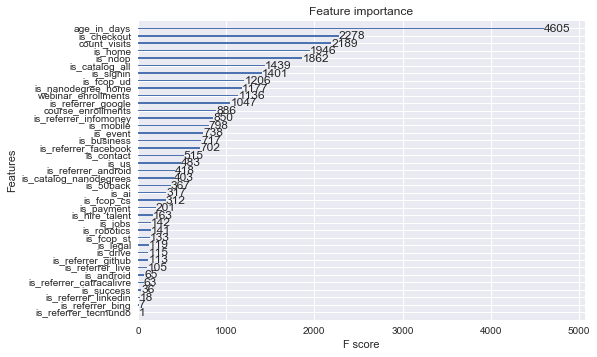

In [273]:
model = xgb.XGBClassifier(
    n_estimators=10000,
    learning_rate=0.01, 
    max_depth=3,
    min_child_weight=1, 
    gamma=0,
    subsample=0.79, 
    colsample_bytree=0.85,
    objective= 'binary:logistic', 
    nthread=8, 
    scale_pos_weight=1, 
    seed=27,
    reg_alpha=3,
    reg_lambda=1.5
)
modelfit(model, show_feature_importance=True, debug=False)

With these parameters, we have reached an optimized model, which generated a **AUC score** of **`0.9630`**.